
# Fairness in learners' success predivtive models

## 1. Introduction and Background

AI in education (AIEd) refers to the use of artificial intelligence (AI) and Machine Learning (ML) techniques in educational contexts with an overall aim to improve teaching and learning. AI and ML can be used in education in a variety of ways, including personalised and adaptable learning experience for individual learners, supporting formative assessments by generating real-time feedback and automating voluminous data analysis to identify students at the risk of failure. There has been significant advancement in the field of AIEd in recent years, primarily driven by the availability of data from a range of educational technologies. Data availability has enabled an extensive use of algorithmic systems to support decision making e.g., identify and support students at risk of failure or drop out. However, more work is needed on improvement in the accuracy and reliability of predictive modelling techniques. Often it is the case that to increase overall model accuracy, predictive modelling ends up making more mistakes for some groups compared to others. Recent work in AIEd suggests that such algorithmic bias may disproportionally effect students from underprivileged and under-representative backgrounds. While those underprivileged and underrepresented students may have already been facing a high risk of dropout. This project focuses on assessment and mitigation of fairness related issues in learners’ success predictive modelling, using the context of the Open University (OU), which is the largest online learning provider in higher education sector in the UK. 

In a recent large-scale study conducted at the Open OU, Nguyen et al. (2020), identified a wide attainment gap, whereby BAME (Black, Asian and Minority Ethnic) students were found to be 19% to 79% less likely to complete, pass or achieve an excellent grade compared to white students. In another recent work, Bayer et al.(2021), showed the extent to which a success prediction system deployed at the OU favoured the majority group (white in this case) and erroneously predicted assignment submissions for Black, Male, Disabled students. Mitigating these, and similar algorithmic errors is critical since otherwise the system practically fails to alert the instructors and to provide support to those who need it most. In an educational context, students’ gender may be critical and linked with their academic achievements. Previous work found that female learners demonstrate an overall behaviour of being relatively high achievers and were found to be more persistent and committed. Other work has reported significant gender differences in behavioural indicators. For example, male students showed stability of attitude towards successful learning with or without taking part in learning activities and female learners exhibited more stable and active participation that may not be linked with their attitude. While amongst other socio-demographic variables, gender may be a critical predictor, the differences in the nature of interactions and in learning outcomes merits more exploration. In addition, socioeconomic status (SES) may also be a critical factor influencing learners success levels or their withdrawal. It is important to highlight that socioeconomic privilege (or a lack of it) may be linked with other factors such as prior education. Particularly in online learning context, the socioeconomic level of students’ area of residence has been a key mediating factor influencing online enrolment and performance. Online learners from developed regions to be more persistent and perform significantly better than those from less developed regions.

Regardless of their accuracies, success or at-risk predictive modelling results may be objectionable if they place certain groups at systematic disadvantage. Students’ success predictive modelling makes extensive use of use contextual and engagement data and the results may be biased towards a specific ethnic, socioeconomic or gender group. It is, of course, important to acknowledge that there could be multiple sources of unfairness in algorithmic systems used in education and it is impossible to fully debias the system. Useful visualisation and exploratory data analysis prior to actual predictive modelling may be used as a first step towards identification of unwanted bias. This analytics project will explore the approaches to identify and mitigate bias in students success predictive modelling using state-of-the-art toolkits (e.g those shared in Bird et al., 2020).

## 2. Methodology

In the context of bias in student success predictive, this analysis will remain focused on potential unfair impact on two sensitive demographic features: Gender, and Socioeconomic status (SES). Next sections in this report explain the process of comparisons in terms of fairness and performance (i.e., accuracy) and how a potential bias can be mitigated to improve the overall fairness. This report also shares the initial exploration of the dataset.

#### Fairness metric

Gender (e.g.,Male, Female).
Socioeconomic status or SES (e.g., Low SES, and High SES) based on Indices of multiple deprivation (IMD band). 
Note that, IMD bands are widely-used datasets within the UK to classify the relative deprivation (essentially a measure of poverty) of small areas. IMD Band combines information from multiple components of deprivation which is then compiled into a single score of deprivation.

### 2.1 Description of Data

This proejct leveraged the anonymised Open University Learning Analytics Dataset (OULAD). The dataset is openly accessible and contains information about university's modules (courses), students' demographics and and their interactions with university's Virtual Learning Environment (VLE). The data contained seven modules, anonymised as AAA, BBB, CCC, DDD, EEE, FFF, GGG, each offered in February (marked as B) or October (marked as J). The dataset contained tables in CSV format. Following figure illustrates the Database schema consists of tables the associated unique identifiers

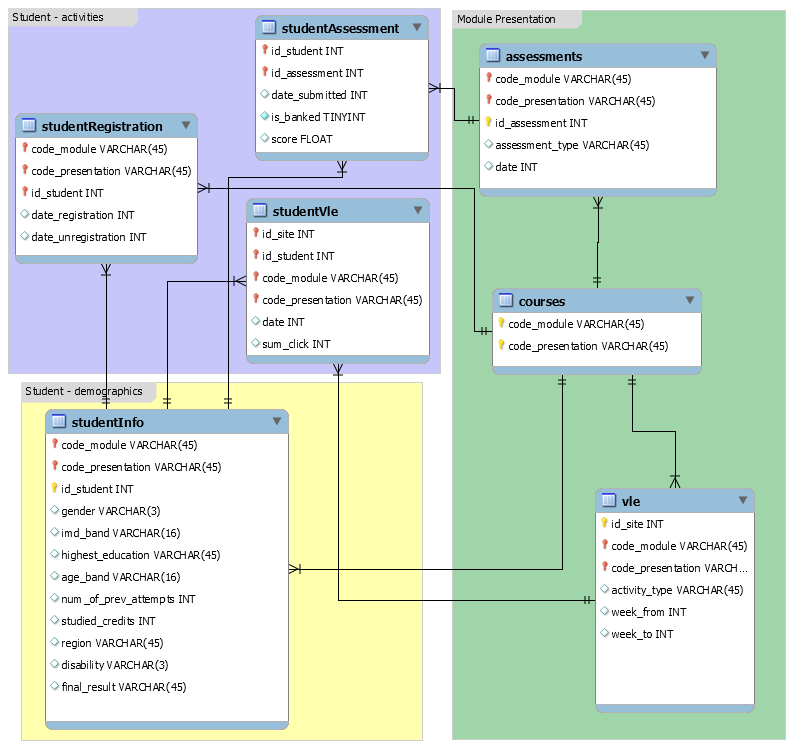

### 2.2 Data analysis methods

#### Exploratory data analysis

The results from an initial exploration of data using data visualisation methods are shared in the first part of this report. In addition to visualisations to understand the variables of interest, Kruskal-Wallis test was used. Kruskal-Wallis test is a nonparametric test useful to determine the significance of differences between the central tendencies (e.g., medians) of two or more independent groups. This test was selected because this test is less sensitive to outliers which are very common in learning analytics data. Moreover, this test is the equivalent of the one-way ANOVA and remains useful even when the data normality assumption is violated. Data retrieval and basic exploratory analysis are explianed below.  

#### Classification, Assessment and mitigation of fairness issues in classification

To evaluate and mitigate issues pertaining fairness, this project made use of Fairlearn; an open-source, community-driven project to help data scientists improve fairness of AI systems. The Fairlearn portfolio included a Python library for fairness assessment and improvement (fairness metrics, mitigation algorithms, plotting, etc.) as well as, educational resources linked with the processes for unfairness mitigation. The resources included comprehensive user guide, detailed case studies, Jupyter notebooks, white papers, etc. The results from predicting the 'fail' status in a respoective course are shared in the follwoing part of this report. 

In [68]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce    
from scipy.stats import kruskal
import statistics
from scipy import stats

from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from fairlearn.metrics import selection_rate
from fairlearn.metrics import MetricFrame, selection_rate, false_positive_rate, false_negative_rate, count
from sklearn.metrics import accuracy_score, precision_score,  recall_score
from fairlearn.reductions import ExponentiatedGradient, GridSearch , DemographicParity, EqualizedOdds, ErrorRateParity, FalsePositiveRateParity


In [69]:
# Retrieve data stored in google drive using a simple function
#Dataset files with links
#courses: https://drive.google.com/file/d/1dmiBIzLlSAhJg-xlNUOIaiQJ-ai59nVl/view?usp=share_link
#assessments: https://drive.google.com/file/d/1MRKcG5kWXgU9q6Id4tYRoKB6Mj7WPdCi/view?usp=share_link
#vle: https://drive.google.com/file/d/1I7qkoVzRaoMmo0488Sj9yCldSjiRSvn_/view?usp=share_link
#studentAssessment: https://drive.google.com/file/d/1-N9-S0Dc61Iy2B7BSuBo-TJfHqp_DfGJ/view?usp=share_link
#studentInfo: https://drive.google.com/file/d/1VVswzO0CTqmhyH67G5J35B15HipYvENb/view?usp=sharing
#studentRegistration: https://drive.google.com/file/d/18TwU8Z2O1umTJUFrZpQ0iMN6ES05VZEA/view?usp=share_link
#studentVle: https://drive.google.com/file/d/1qtIcXqU54JRKDn5h-UXUKmFy_0GHDFf9/view?usp=share_link

def readfile(url):
    path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
    return pd.read_csv(path)

In [70]:
# writing a short function to merge data on keys except that 'inner'
def combine(df1,df2,key):
    return df1.merge(df2, how = 'inner',suffixes=('', '_y'),left_on = key, right_on = key)

In [148]:
# writing a function to produce consistent boxplot
def drawboxplot(x_axis,y_axis,dataframe):
    plt.show()
    sns.set_style("whitegrid")
    plt.figure(figsize=(8, 3)) # For two column paper (3.1, 3). Each column is about 3.15 inch wide
    sns.set_context("paper", font_scale=0.9) # font_scale=0.9 # 2
    plt.xticks(rotation = 45)
    sns.boxplot(x= x_axis,y= y_axis,data=dataframe)
    #plt.savefig(x_axis+' vs '+y_axis, bbox_inches='tight')   

In [72]:
# Kruskal-Wallis H-test : 
# writing a function to make sample comparisons easy
def kw(*args):
    stat, p = kruskal(*args)#...data7, data8, data9
    print('H(df) = %.3f, p = %.3f, df = (number of data groups)-1' % (stat, p))
    # how to interpret
    alpha = 0.05
    if p > alpha:
        print('Same distributions. No difference. (fail to reject H0)')
    else:
        print('Different distributions. To understand the differences, examine medians and then do follow-up (reject H0)')

In [73]:
courses = readfile('https://drive.google.com/file/d/1dmiBIzLlSAhJg-xlNUOIaiQJ-ai59nVl/view?usp=share_link')
courses.head(3)

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268


In [74]:
#More about the courses data table
courses['code_module'].unique()
#There are 22 unique combinations of code-module - code presentation in the dataset. 

array(['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG'], dtype=object)

In [75]:
assessments = readfile("https://drive.google.com/file/d/1MRKcG5kWXgU9q6Id4tYRoKB6Mj7WPdCi/view?usp=share_link")
assessments.head(3)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0


In [76]:
# More about assessments data table:
# There are three assessment types: Tutor Marked Assessment (TMA), Computer Marked Assessment (CMA) and Final Exam (Exam)
# date = The final submission date of the assessment calculated as the number of days since start of module-presentation (starting date=0). 
assessments['assessment_type'].unique()
assessments['id_assessment'].nunique() # There is information about 206 unique assessment ids in this data

206

In [77]:
vle = readfile('https://drive.google.com/file/d/1I7qkoVzRaoMmo0488Sj9yCldSjiRSvn_/view?usp=share_link')
vle.head(3)

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN


In [78]:
# more about vle data table:
# activity_type is the role associated with the module material e.g., url, resource, oucontent
# week-from is the same as week_to which is either null or exactly equal, 
# both show the week number (0-29) when material was planned to be used by the learner (max 30 weeks).
# vle['activity_type'].nunique()
vle['activity_type'].unique() # There are 20 unique activity types

array(['resource', 'oucontent', 'url', 'homepage', 'subpage', 'glossary',
       'forumng', 'oucollaborate', 'dataplus', 'quiz', 'ouelluminate',
       'sharedsubpage', 'questionnaire', 'page', 'externalquiz', 'ouwiki',
       'dualpane', 'repeatactivity', 'folder', 'htmlactivity'],
      dtype=object)

In [79]:
studentInfo = readfile('https://drive.google.com/file/d/1VVswzO0CTqmhyH67G5J35B15HipYvENb/view?usp=sharing')
studentInfo.head(3)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn


In [80]:
# more information about studentInfo
# studentInfo contains students demographic information along with their final results (Pass/Fail/Distinction/Withdrawn)
# num_of_prev_attempts = number times the student has attempted this module
studentInfo['id_student'].nunique() # there are 28785 unique student ids for enrolled students

28785

In [81]:
studentRegistration = readfile('https://drive.google.com/file/d/18TwU8Z2O1umTJUFrZpQ0iMN6ES05VZEA/view?usp=share_link')
studentRegistration.head(3)

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0


In [82]:
# more about studentRegistration data table
#studentRegistration gives information about students registration in a module along with its presentation.
#Note that those unregistered (number of days relative to the module start date) will have 'Withdrawn' in final_result in studentInfo
#date_registration = the date of student’s registration on the module presentation, 
#this is the number of days measured relative to the start of the module-presentation 
#(e.g. the negative value -30 means that the student registered to module presentation 30 days before it started).
studentRegistration['date_unregistration'].describe()
studentRegistration['date_registration'].describe() # students generally register 57 days prior to the start date.

count    32548.000000
mean       -69.411300
std         49.260522
min       -322.000000
25%       -100.000000
50%        -57.000000
75%        -29.000000
max        167.000000
Name: date_registration, dtype: float64

In [83]:
studentAssessment = readfile('https://drive.google.com/file/d/1-N9-S0Dc61Iy2B7BSuBo-TJfHqp_DfGJ/view?usp=share_link')
studentAssessment.head(3)

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0


In [84]:
# more about studentsAssessments
# Score is the score in respective assessment (range 0-100 and score<40 means Fail)
# Note that is_bank is a flag to identify if this result was transferred from a previous presenattion
studentAssessment["id_student"].nunique() # Data of assessments was available for n = 23369 students
(studentAssessment['is_banked'] != 0).sum() #(1909/173912 results were transferred)
studentAssessment['score'].describe() # median score = 80

count    173739.000000
mean         75.799573
std          18.798107
min           0.000000
25%          65.000000
50%          80.000000
75%          90.000000
max         100.000000
Name: score, dtype: float64

In [85]:
#studentVle = readfile('') # originally zipped at: https://analyse.kmi.open.ac.uk/open_dataset#rights
studentVle = pd.read_csv('C:\\Users\\sszr4\\Desktop\\Python_CW1\\CW1_Data\\anonymisedData\\studentVle.csv')
studentVle.head(3)

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1


In [86]:
# more about studentVle data table
# this table contains information about students' interactions with VLE material
# id_site is the material key in vle 
# date = student's interaction with the material, measured as the number of days since the start of the module-presentation.
# sum_click = the number of times a student interacts with the material in that day.
# note that apparently sum_clicks may have sum of the clicks may have multiple entries, for same material same day
# That means this is sum_clicks in one go!
studentVle['sum_click'].describe() # in one go/one session, students' clicked two times on average, (max =6977 is an outlier)

count    1.065528e+07
mean     3.716946e+00
std      8.849047e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      6.977000e+03
Name: sum_click, dtype: float64

In [87]:
# merging courses, vle and assesments to get a clear picture of module presentation at one place 
module_presentation = reduce(lambda left, right:          
                             pd.merge(left , right, on = ["code_module","code_presentation"], how = "outer"), #keys
                             [courses, vle, assessments]) #dataframes
module_presentation.head(3)

,code_module,code_presentation,module_presentation_length,id_site,activity_type,week_from,week_to,id_assessment,assessment_type,date,weight
0,AAA,2013J,268,546943,resource,NaN,NaN,1752,TMA,19.0,10.0
1,AAA,2013J,268,546943,resource,NaN,NaN,1753,TMA,54.0,20.0
2,AAA,2013J,268,546943,resource,NaN,NaN,1754,TMA,117.0,20.0


In [88]:
studentAssessment_assessments = combine(studentAssessment, assessments, 'id_assessment') #dataframes
studentAssessment_assessments.head(3)

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0


In [89]:
# to get students performance data in assessments as well as their final score along with their demographics, merge
studentPerformance = combine(studentInfo, studentAssessment_assessments, 'id_student')
studentPerformance.columns
#studentPerformance.head(3)

Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'id_assessment',
       'date_submitted', 'is_banked', 'score', 'code_module_y',
       'code_presentation_y', 'assessment_type', 'date', 'weight'],
      dtype='object')

In [90]:
studentPerformance["id_student"].nunique() # data from (n=23369) students can be found

23369

In [91]:
studentPerformance['SES'] = studentPerformance['imd_band']
studentPerformance['SES'].unique()
studentPerformance.loc[(studentPerformance['SES'] == '90-100%') | (studentPerformance['SES'] == '80-90%')| (studentPerformance['SES'] == '70-80%')| (studentPerformance['SES'] == '60-70%')| (studentPerformance['SES'] == '50-60%'), 'SES'] = 'high'
studentPerformance.loc[(studentPerformance['SES'] == '90-100%') | (studentPerformance['SES'] == '80-90%')| (studentPerformance['SES'] == '0-10%')| (studentPerformance['SES'] == '10-20')| (studentPerformance['SES'] == '20-30%')| (studentPerformance['SES'] == '30-40%')| (studentPerformance['SES'] == '40-50%'), 'SES'] = 'low'
studentPerformance['SES'].unique()

array(['high', 'low', nan], dtype=object)

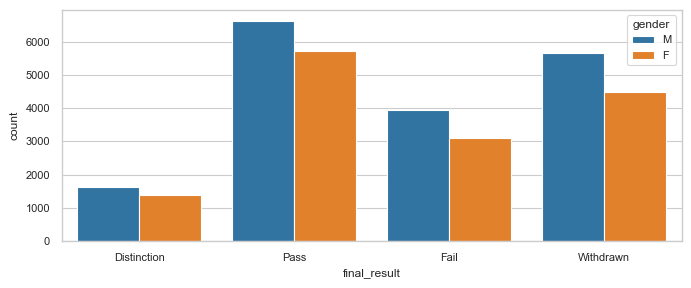

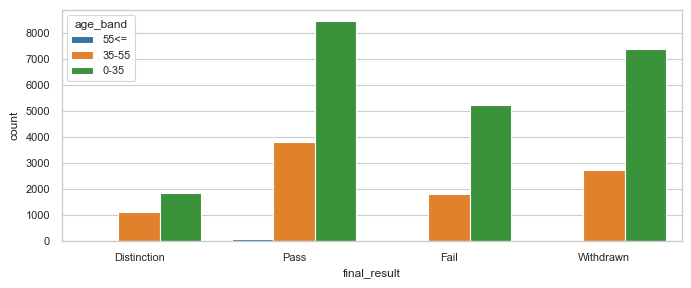

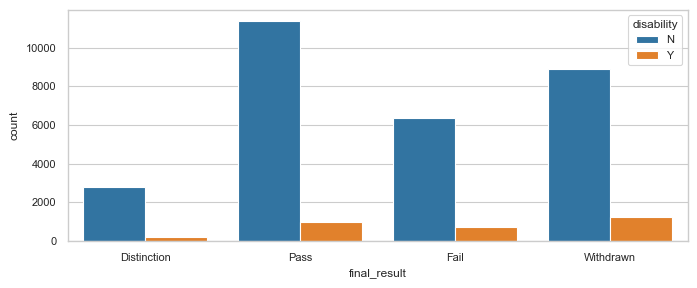

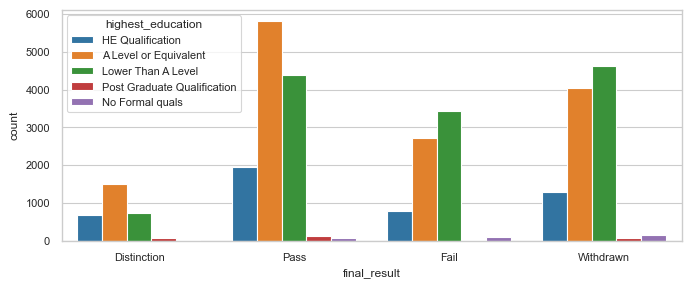

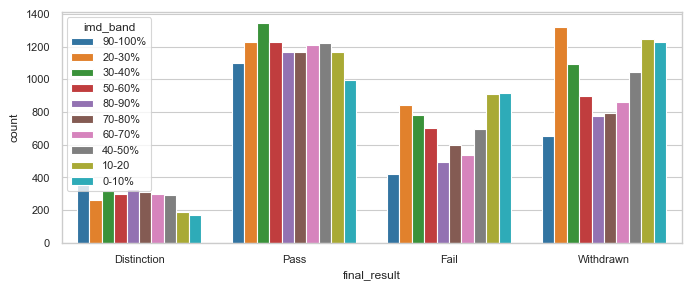

In [147]:
# Count graphs to see the ratio of students with respect to final results (Distinction/Pass/Fail/Withdrawn).Check all 6 demographics
variable = ['gender','age_band','disability','highest_education','imd_band']#,'region'
for var in variable:
    plt.figure(figsize=(8, 3)) # For two column paper (3.1, 3). Each column is about 3.15 inch wide
    sns.set_context("paper", font_scale= 0.9) # font_scale=0.9, OR 2.2
    sns.countplot(x="final_result", hue=var, order = ["Distinction", "Pass", "Fail", "Withdrawn"], #orient ="h",
                  data=studentInfo)#.query("code_module == 'AAA'"))
    plt.show()

In [124]:
# Mean score also represents performance 
studentMeanScore = studentPerformance.groupby(['id_student', 'gender', 'region', 'highest_education', 'imd_band','SES', 'age_band','disability',
                                               'num_of_prev_attempts', 'studied_credits',
                                               'final_result','code_module','code_presentation','assessment_type'], as_index=False)['score'].mean()
#studentMeanScore.columns 
#studentMeanScore['id_student'].nunique() # complete information for mean score was available for n = 22488 
studentMeanScore.head(3)

,id_student,gender,region,highest_education,imd_band,SES,age_band,disability,num_of_prev_attempts,studied_credits,final_result,code_module,code_presentation,assessment_type,score
0,6516,M,Scotland,HE Qualification,80-90%,high,55<=,N,0,60,Pass,AAA,2014J,TMA,61.8
1,8462,M,London Region,HE Qualification,30-40%,low,55<=,N,0,90,Withdrawn,DDD,2013J,TMA,87.0
2,8462,M,London Region,HE Qualification,30-40%,low,55<=,N,1,60,Withdrawn,DDD,2014J,TMA,87.0


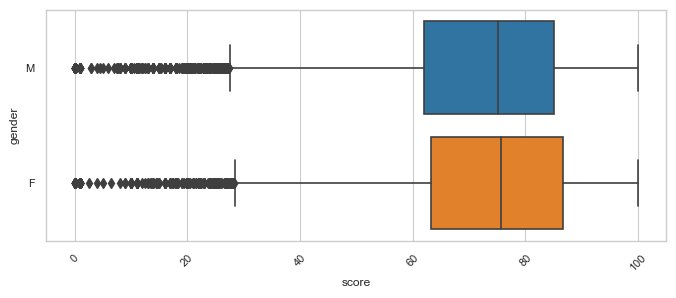

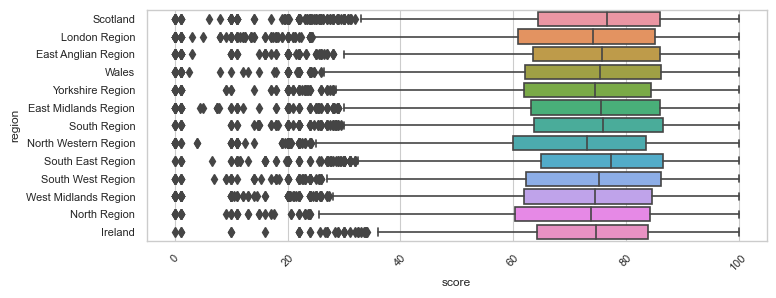

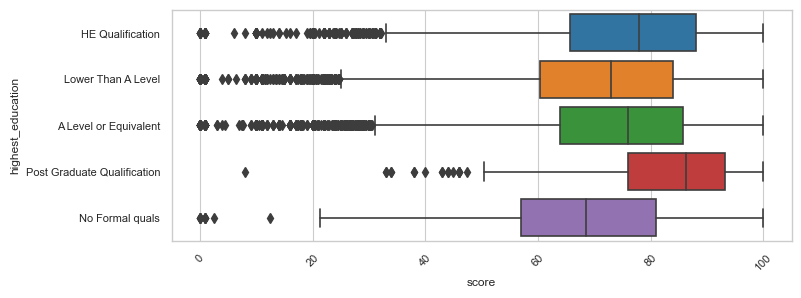

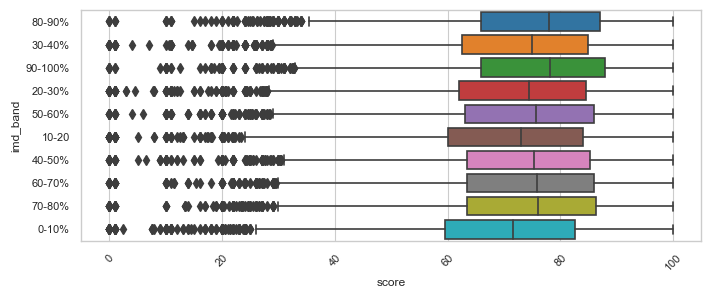

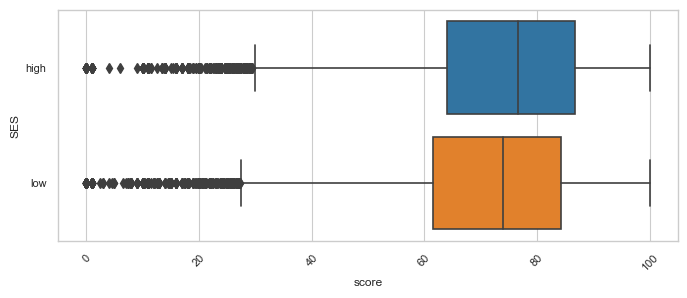

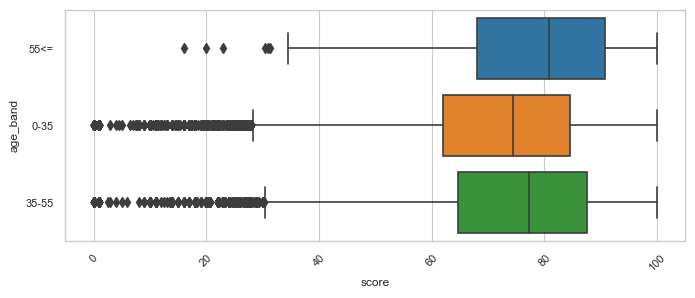

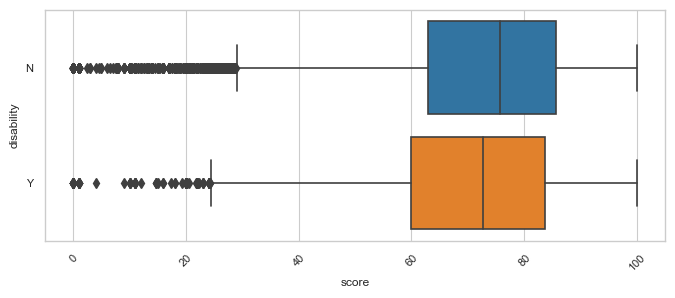

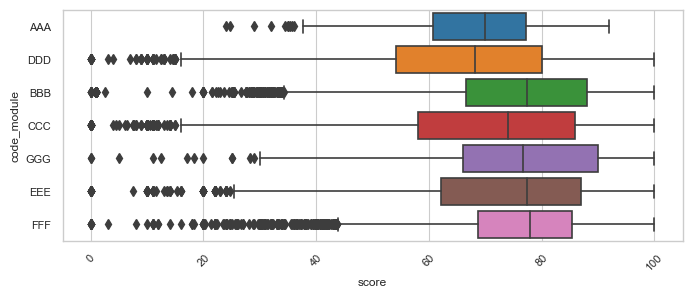

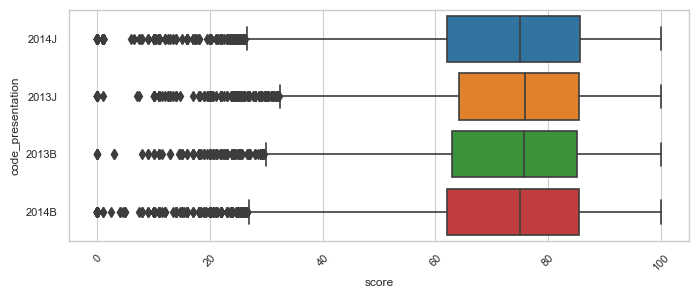

In [142]:
# How and in what ways assessment score may be different between the follwoing variable of interest:
variable = ['gender', 'region', 'highest_education', 'imd_band','SES', 'age_band','disability','code_module','code_presentation']

for var in variable:
    drawboxplot('score',var,studentMeanScore)

<Figure size 2000x1000 with 0 Axes>

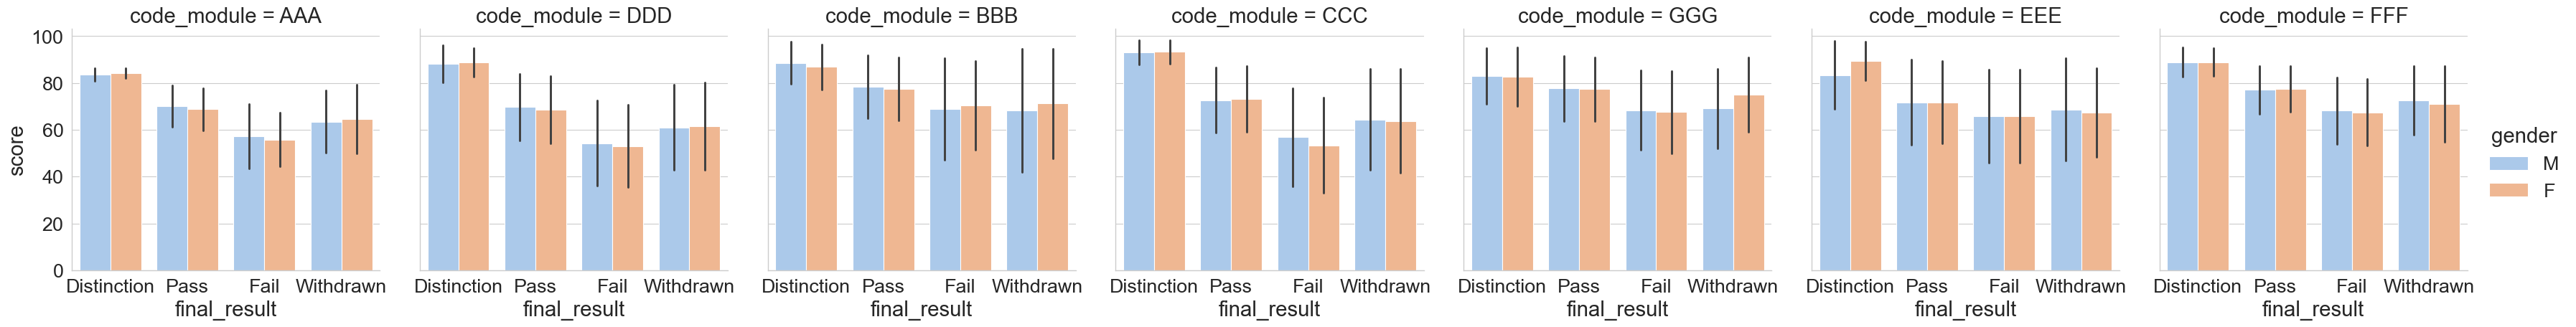

In [128]:
#multivariate analysis GENDER
#(studentMeanScore['code_module']).unique()
# Is there a gender difference in scores amongst those who attained differnt final results? variations in different courses? 
plt.figure(figsize=(20, 10)) # For two column paper (3.1, 3). Each column is about 3.15 inch wide
sns.set_context("paper", font_scale=2.2) # font_scale=0.9
sns.catplot(x="final_result", y="score", hue="gender", 
            col = "code_module", kind="bar",palette="pastel", ci = "sd",
            order=["Distinction", "Pass", "Fail", "Withdrawn"],# hue_order= ["male", "female"], 
            data = studentMeanScore)
plt.show()

<Figure size 2000x1000 with 0 Axes>

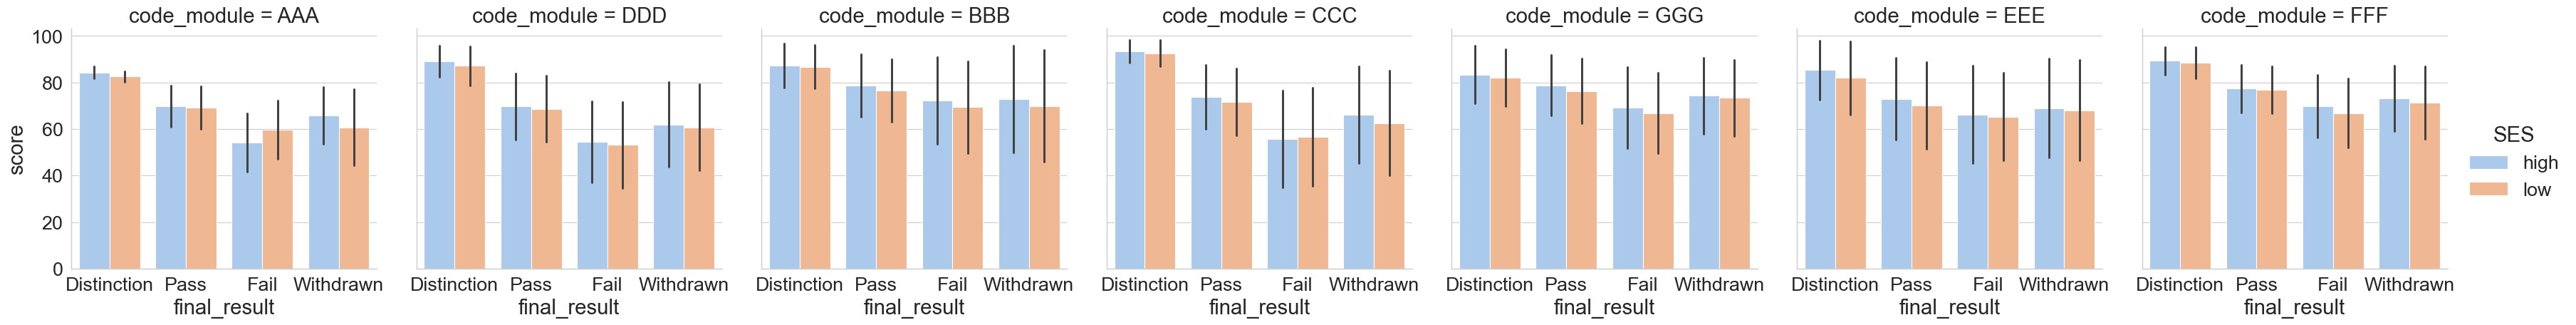

In [129]:
#multivariate analysis SES
#(studentMeanScore['code_module']).unique()
# Is there are SES difference in scores amongst those who attained differnt final results? variations in different courses? 
plt.figure(figsize=(20, 10)) # For two column paper (3.1, 3). Each column is about 3.15 inch wide
sns.set_context("paper", font_scale=2.2) # font_scale=0.9
sns.catplot(x="final_result", y="score", hue="SES", 
            col = "code_module", kind="bar",palette="pastel", ci = "sd",
            order=["Distinction", "Pass", "Fail", "Withdrawn"],# hue_order= ["male", "female"], 
            data = studentMeanScore)
plt.show()

In [130]:
# Course level analysis of differences
# Module = AAA
#studentMeanScore_AAA_2014J = studentMeanScore[(studentMeanScore['code_module'] == 'AAA') & (studentMeanScore['code_presentation'] =='2014J')]
studentMeanScore_AAA_M = studentMeanScore[(studentMeanScore['code_module'] == 'AAA') & (studentMeanScore['gender'] =='M')]
studentMeanScore_AAA_F = studentMeanScore[(studentMeanScore['code_module'] == 'AAA') & (studentMeanScore['gender'] =='F')]
AAA_M_Score = studentMeanScore_AAA_M['score'].dropna()
AAA_F_Score = studentMeanScore_AAA_F['score'].dropna()

In [31]:
print("First median =",AAA_M_Score.median(),",","Second median =",AAA_F_Score.median())
kw(AAA_M_Score,AAA_F_Score)

First median = 71.0 , Second median = 68.6
H(df) = 3.406, p = 0.065, df = (number of data groups)-1
Same distributions. No difference. (fail to reject H0)


In [131]:
# Module = BBB
studentMeanScore_BBB_M = studentMeanScore[(studentMeanScore['code_module'] == 'BBB') & (studentMeanScore['gender'] =='M')]
studentMeanScore_BBB_F = studentMeanScore[(studentMeanScore['code_module'] == 'BBB') & (studentMeanScore['gender'] =='F')]
BBB_M_Score = studentMeanScore_BBB_M['score'].dropna()
BBB_F_Score = studentMeanScore_BBB_F['score'].dropna()

In [33]:
print("First median =",BBB_M_Score.median(),",","Second median =",BBB_F_Score.median())
kw(BBB_M_Score,BBB_F_Score)

First median = 78.0 , Second median = 77.4
H(df) = 0.485, p = 0.486, df = (number of data groups)-1
Same distributions. No difference. (fail to reject H0)


In [34]:
# Module = CCC
studentMeanScore_CCC_M = studentMeanScore[(studentMeanScore['code_module'] == 'CCC') & (studentMeanScore['gender'] =='M')]
studentMeanScore_CCC_F = studentMeanScore[(studentMeanScore['code_module'] == 'CCC') & (studentMeanScore['gender'] =='F')]
CCC_M_Score = studentMeanScore_CCC_M['score'].dropna()
CCC_F_Score = studentMeanScore_CCC_F['score'].dropna()

In [35]:
print("First median =",CCC_M_Score.median(),",","Second median =",CCC_F_Score.median())
kw(CCC_M_Score,CCC_F_Score)

First median = 73.5 , Second median = 75.0
H(df) = 6.928, p = 0.008, df = (number of data groups)-1
Different distributions. To understand the differences, examine medians and then do follow-up (reject H0)


In [36]:
# Module = DDD
studentMeanScore_DDD_M = studentMeanScore[(studentMeanScore['code_module'] == 'DDD') & (studentMeanScore['gender'] =='M')]
studentMeanScore_DDD_F = studentMeanScore[(studentMeanScore['code_module'] == 'DDD') & (studentMeanScore['gender'] =='F')]
DDD_M_Score = studentMeanScore_DDD_M['score'].dropna()
DDD_F_Score = studentMeanScore_DDD_F['score'].dropna()

In [37]:
print("First median =",DDD_M_Score.median(),",","Second median =",DDD_F_Score.median())
kw(DDD_M_Score,DDD_F_Score)

First median = 69.0 , Second median = 67.0
H(df) = 24.117, p = 0.000, df = (number of data groups)-1
Different distributions. To understand the differences, examine medians and then do follow-up (reject H0)


In [38]:
# Module = EEE
studentMeanScore_EEE_M = studentMeanScore[(studentMeanScore['code_module'] == 'EEE') & (studentMeanScore['gender'] =='M')]
studentMeanScore_EEE_F = studentMeanScore[(studentMeanScore['code_module'] == 'EEE') & (studentMeanScore['gender'] =='F')]
EEE_M_Score = studentMeanScore_EEE_M['score'].dropna()
EEE_F_Score = studentMeanScore_EEE_F['score'].dropna()

In [39]:
print("First median =",EEE_M_Score.median(),",","Second median =",EEE_F_Score.median())
kw(EEE_M_Score,EEE_F_Score)

First median = 77.33333333333333 , Second median = 77.625
H(df) = 0.117, p = 0.732, df = (number of data groups)-1
Same distributions. No difference. (fail to reject H0)


In [40]:
# Module = FFF
studentMeanScore_FFF_M = studentMeanScore[(studentMeanScore['code_module'] == 'FFF') & (studentMeanScore['gender'] =='M')]
studentMeanScore_FFF_F = studentMeanScore[(studentMeanScore['code_module'] == 'FFF') & (studentMeanScore['gender'] =='F')]
FFF_M_Score = studentMeanScore_FFF_M['score'].dropna()
FFF_F_Score = studentMeanScore_FFF_F['score'].dropna()

In [41]:
print("First median =",FFF_M_Score.median(),",","Second median =",FFF_F_Score.median())
kw(FFF_M_Score,FFF_F_Score)

First median = 77.8 , Second median = 78.28571428571429
H(df) = 5.421, p = 0.020, df = (number of data groups)-1
Different distributions. To understand the differences, examine medians and then do follow-up (reject H0)


In [42]:
# Module = GGG
studentMeanScore_GGG_M = studentMeanScore[(studentMeanScore['code_module'] == 'GGG') & (studentMeanScore['gender'] =='M')]
studentMeanScore_GGG_F = studentMeanScore[(studentMeanScore['code_module'] == 'GGG') & (studentMeanScore['gender'] =='F')]
GGG_M_Score = studentMeanScore_GGG_M['score'].dropna()
GGG_F_Score = studentMeanScore_GGG_F['score'].dropna()

In [43]:
print("First median =",GGG_M_Score.median(),",","Second median =",GGG_F_Score.median())
kw(GGG_M_Score,GGG_F_Score)

First median = 77.0 , Second median = 76.66666666666667
H(df) = 0.121, p = 0.728, df = (number of data groups)-1
Same distributions. No difference. (fail to reject H0)


In [44]:
# Course level analysis of differences: SES
# Module = AAA
#studentMeanScore_AAA_2014J = studentMeanScore[(studentMeanScore['code_module'] == 'AAA') & (studentMeanScore['code_presentation'] =='2014J')]
studentMeanScore_AAA_high = studentMeanScore[(studentMeanScore['code_module'] == 'AAA') & (studentMeanScore['SES'] =='high')]
studentMeanScore_AAA_low = studentMeanScore[(studentMeanScore['code_module'] == 'AAA') & (studentMeanScore['SES'] =='low')]
AAA_high_Score = studentMeanScore_AAA_high['score'].dropna()
AAA_low_Score = studentMeanScore_AAA_low['score'].dropna()

In [45]:
print("First median =",AAA_high_Score.median(),",","Second median =",AAA_low_Score.median())
kw(AAA_high_Score,AAA_low_Score)

First median = 70.9 , Second median = 69.5
H(df) = 0.891, p = 0.345, df = (number of data groups)-1
Same distributions. No difference. (fail to reject H0)


In [46]:
# Course level analysis of differences: SES
# Module = BBB
studentMeanScore_BBB_high = studentMeanScore[(studentMeanScore['code_module'] == 'BBB') & (studentMeanScore['SES'] =='high')]
studentMeanScore_BBB_low = studentMeanScore[(studentMeanScore['code_module'] == 'BBB') & (studentMeanScore['SES'] =='low')]
BBB_high_Score = studentMeanScore_BBB_high['score'].dropna()
BBB_low_Score = studentMeanScore_BBB_low['score'].dropna()

In [47]:
print("First median =",BBB_high_Score.median(),",","Second median =",BBB_low_Score.median())
kw(BBB_high_Score,BBB_low_Score)

First median = 80.0 , Second median = 76.0
H(df) = 93.227, p = 0.000, df = (number of data groups)-1
Different distributions. To understand the differences, examine medians and then do follow-up (reject H0)


In [48]:
# Course level analysis of differences: SES
# Module = CCC
studentMeanScore_CCC_high = studentMeanScore[(studentMeanScore['code_module'] == 'CCC') & (studentMeanScore['SES'] =='high')]
studentMeanScore_CCC_low = studentMeanScore[(studentMeanScore['code_module'] == 'CCC') & (studentMeanScore['SES'] =='low')]
CCC_high_Score = studentMeanScore_CCC_high['score'].dropna()
CCC_low_Score = studentMeanScore_CCC_low['score'].dropna()

In [49]:
print("First median =",CCC_high_Score.median(),",","Second median =",CCC_low_Score.median())
kw(CCC_high_Score,CCC_low_Score)

First median = 76.0 , Second median = 72.0
H(df) = 67.481, p = 0.000, df = (number of data groups)-1
Different distributions. To understand the differences, examine medians and then do follow-up (reject H0)


In [50]:
# Course level analysis of differences: SES
# Module = DDD
studentMeanScore_DDD_high = studentMeanScore[(studentMeanScore['code_module'] == 'DDD') & (studentMeanScore['SES'] =='high')]
studentMeanScore_DDD_low = studentMeanScore[(studentMeanScore['code_module'] == 'DDD') & (studentMeanScore['SES'] =='low')]
DDD_high_Score = studentMeanScore_DDD_high['score'].dropna()
DDD_low_Score = studentMeanScore_DDD_low['score'].dropna()

In [51]:
print("First median =",DDD_high_Score.median(),",","Second median =",DDD_low_Score.median())
kw(DDD_high_Score,DDD_low_Score)

First median = 69.5 , Second median = 67.0
H(df) = 46.986, p = 0.000, df = (number of data groups)-1
Different distributions. To understand the differences, examine medians and then do follow-up (reject H0)


In [52]:
# Course level analysis of differences: SES
# Module = EEE
studentMeanScore_EEE_high = studentMeanScore[(studentMeanScore['code_module'] == 'EEE') & (studentMeanScore['SES'] =='high')]
studentMeanScore_EEE_low = studentMeanScore[(studentMeanScore['code_module'] == 'EEE') & (studentMeanScore['SES'] =='low')]
EEE_high_Score = studentMeanScore_EEE_high['score'].dropna()
EEE_low_Score = studentMeanScore_EEE_low['score'].dropna()

In [53]:
print("First median =",EEE_high_Score.median(),",","Second median =",EEE_low_Score.median())
kw(EEE_high_Score,EEE_low_Score)

First median = 79.33333333333333 , Second median = 74.5
H(df) = 34.771, p = 0.000, df = (number of data groups)-1
Different distributions. To understand the differences, examine medians and then do follow-up (reject H0)


In [54]:
# Course level analysis of differences: SES
# Module = FFF
studentMeanScore_FFF_high = studentMeanScore[(studentMeanScore['code_module'] == 'FFF') & (studentMeanScore['SES'] =='high')]
studentMeanScore_FFF_low = studentMeanScore[(studentMeanScore['code_module'] == 'FFF') & (studentMeanScore['SES'] =='low')]
FFF_high_Score = studentMeanScore_FFF_high['score'].dropna()
FFF_low_Score = studentMeanScore_FFF_low['score'].dropna()

In [55]:
print("First median =",FFF_high_Score.median(),",","Second median =",FFF_low_Score.median())
kw(FFF_high_Score,FFF_low_Score)

First median = 79.0 , Second median = 76.78888888888889
H(df) = 75.914, p = 0.000, df = (number of data groups)-1
Different distributions. To understand the differences, examine medians and then do follow-up (reject H0)


In [56]:
# Course level analysis of differences: SES
# Module = GGG
studentMeanScore_GGG_high = studentMeanScore[(studentMeanScore['code_module'] == 'GGG') & (studentMeanScore['SES'] =='high')]
studentMeanScore_GGG_low = studentMeanScore[(studentMeanScore['code_module'] == 'GGG') & (studentMeanScore['SES'] =='low')]
GGG_high_Score = studentMeanScore_GGG_high['score'].dropna()
GGG_low_Score = studentMeanScore_GGG_low['score'].dropna()

In [57]:
print("First median =",GGG_high_Score.median(),",","Second median =",GGG_low_Score.median())
kw(GGG_high_Score,GGG_low_Score)

First median = 78.66666666666667 , Second median = 76.0
H(df) = 30.280, p = 0.000, df = (number of data groups)-1
Different distributions. To understand the differences, examine medians and then do follow-up (reject H0)


In [58]:
studentMeanScore.columns

Index(['id_student', 'gender', 'region', 'highest_education', 'imd_band',
       'SES', 'age_band', 'disability', 'num_of_prev_attempts',
       'studied_credits', 'final_result', 'code_module', 'code_presentation',
       'assessment_type', 'score'],
      dtype='object')

In [59]:
#preparing data to run a basic classification model and see if it perfoms fairly for different genders and different SES levels.
studentMeanScore_s = studentMeanScore[['code_presentation','num_of_prev_attempts','studied_credits', 
                                       'gender', 'region', 'highest_education','SES', 'age_band', 
                                       'disability','assessment_type', 'score']]


studentMeanScore_selected = studentMeanScore_s.dropna()
X = pd.get_dummies(studentMeanScore_selected)
y_true = studentMeanScore.dropna().final_result == 'Fail'

#y_true = studentMeanScore.final_result #(studentMeanScore.final_result == 'Pass')


In [60]:
# Deciding potentially useful sensitive variables 
sex = studentMeanScore_selected['gender'].dropna()
sex.value_counts()

SES = studentMeanScore_selected['SES'].dropna()
SES.value_counts()

low     24391
high    22423
Name: SES, dtype: int64

In [61]:
classifier = DecisionTreeClassifier(min_samples_leaf=10, max_depth=4)
classifier.fit(X, y_true)
y_pred = classifier.predict(X)


In [62]:
# Evaluation for gender
gm_sex = MetricFrame(metrics=accuracy_score, y_true=y_true, y_pred=y_pred, sensitive_features=sex) #sex
print(gm_sex.overall)
print(gm_sex.by_group)

# evaluation for SES
gm_SES = MetricFrame(metrics=accuracy_score, y_true=y_true, y_pred=y_pred, sensitive_features=SES) #sex
print(gm_SES.overall)
print(gm_SES.by_group)

0.8045883710001281
gender
F    0.802752
M    0.806028
Name: accuracy_score, dtype: float64
0.8045883710001281
SES
high    0.831200
low     0.780124
Name: accuracy_score, dtype: float64


In [63]:
# using model performance and other metrics e.g., selection_rate

sr = MetricFrame(metrics=selection_rate, y_true=y_true, y_pred=y_pred, sensitive_features=SES)
print(sr.overall)
print(sr.by_group)

0.031464946383560476
SES
high    0.026401
low     0.036120
Name: selection_rate, dtype: float64


array([[<AxesSubplot:title={'center':'accuracy'}, xlabel='SES'>,
        <AxesSubplot:title={'center':'precision'}, xlabel='SES'>,
        <AxesSubplot:title={'center':'recall'}, xlabel='SES'>],
       [<AxesSubplot:title={'center':'false positive rate'}, xlabel='SES'>,
        <AxesSubplot:title={'center':'false negative rate'}, xlabel='SES'>,
        <AxesSubplot:title={'center':'selection rate'}, xlabel='SES'>],
       [<AxesSubplot:title={'center':'count'}, xlabel='SES'>,
        <AxesSubplot:xlabel='SES'>, <AxesSubplot:xlabel='SES'>]],
      dtype=object)

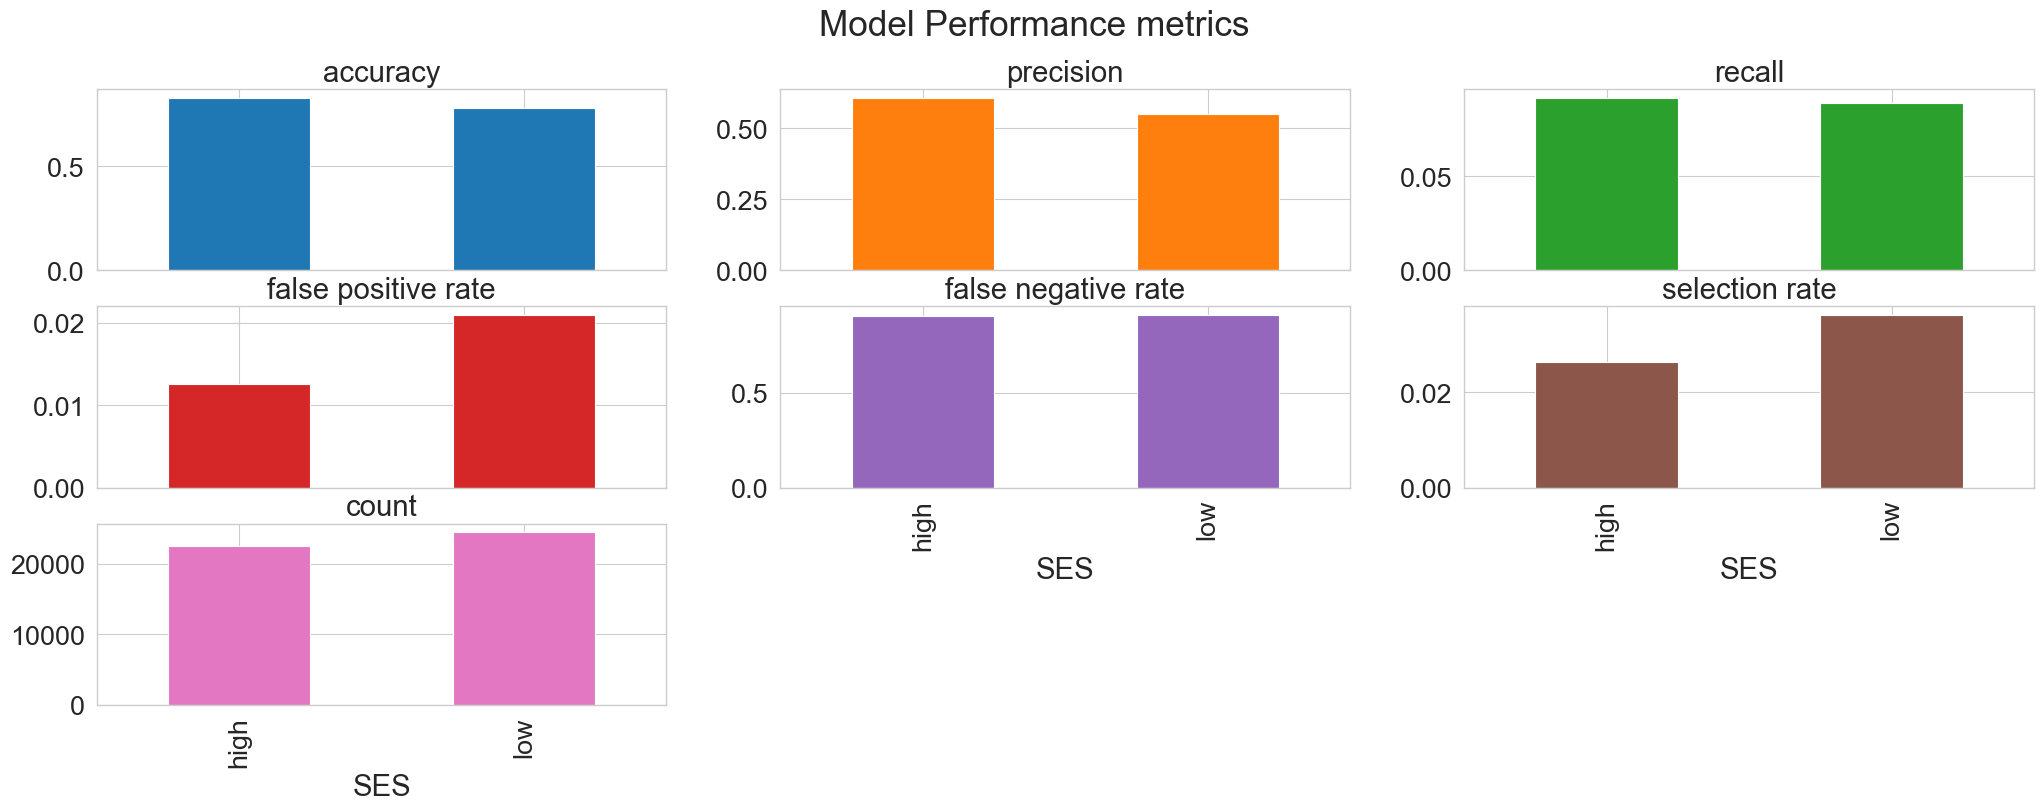

In [136]:
# Other metrices; Visualise the results for useful comparisons
# Fairlearn provides fairness-related metrics that can be compared between groups and for the overall population.
metrics = {
    "accuracy": accuracy_score,
    "precision": precision_score,
    'recall': recall_score,
    "false positive rate": false_positive_rate,
    "false negative rate": false_negative_rate,
    "selection rate": selection_rate,
    "count": count,
}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_true, y_pred=y_pred, sensitive_features=SES
)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[25, 8],
    title="Model Performance metrics",
)

In [65]:
# Mitigating disparity
# As we observed disparities between gender and in particular SES groups, a new model is required with an appropriate fairness constraint.
from fairlearn.reductions import ExponentiatedGradient, GridSearch , DemographicParity, EqualizedOdds, ErrorRateParity, FalsePositiveRateParity
np.random.seed(0)  # set seed for consistent results with ExponentiatedGradient

In [ ]:
# Mitigation using the constraint of ErrorRateParity, and mitigation technique ExponentiatedGradient  
constraint = ErrorRateParity()#EqualizedOdds()#DemographicParity()#ErrorRateParity()
classifier = DecisionTreeClassifier(min_samples_leaf=10, max_depth=4)
mitigator = ExponentiatedGradient(classifier, constraint)# GridSearch #ExponentiatedGradient
mitigator.fit(X, y_true, sensitive_features=SES)

In [ ]:
y_pred_mitigated = mitigator.predict(X)
sr_mitigated = MetricFrame(metrics=selection_rate, y_true=y_true, y_pred=y_pred_mitigated, sensitive_features=SES)
print(sr_mitigated.overall)
print(sr_mitigated.by_group)

In [ ]:
y_pred_mitigated = mitigator.predict(X)
fpr_mitigated = MetricFrame(metrics=false_positive_rate, y_true=y_true, y_pred=y_pred_mitigated, sensitive_features=SES)
print(fpr_mitigated.overall)
print(fpr_mitigated.by_group)

In [ ]:
y_pred_mitigated = mitigator.predict(X)
acc_mitigated = MetricFrame(metrics=accuracy_score, y_true=y_true, y_pred=y_pred_mitigated, sensitive_features=SES)
print(acc_mitigated.overall)
print(acc_mitigated.by_group)

In [ ]:
# Comparing the accuracy rates for different SES levels before mitigation and after mitigation
print("Before unfairness mitigation")
print("initial model:", gm_SES.overall)
print("initial model:", gm_SES.by_group)
print("")
print("After unfairness mitigation:")
print("mitigated.overall", acc_mitigated.overall)
print("mitigated model:", acc_mitigated.by_group)

## 3. Results and Discussion

### Exploratory analysis and unfairness assessment

Drawing a count graphs helped understand the datapoint size or any imbalance, that may potentially influence the predictive model results. The demographic variables were used as follows: gender, age_band, highest_education, disability, region, and imd_band and a similar but binary SES. The count graph displayed the number of observations in each demegographic category with respect to their final results (Distinction / Pass / Fail / Withdrawn). In addition to final results, mean score in assessmnets also represents students' performance.

Box and whisker charts generally help to understand the look and feel of data by showing the distribution into quartiles, and by highlighting the mean and presence of outliers. The plot helped understand how and in what ways assessment score may be different between the follwoing variable of interest: gender, region, highest_education, imd_band, SES, age_band,disability, and finally in code_modules, and code_presentations. It turned out that score generally remain high and uniform, but some differences in specific categories. For example, students with post graduate qualification score was much elevated than the rest of the students. Similarly, those from lowest socioeconomic groups (imd band 0-10%) visibally scored the lowest amongst all. 

The next question was is there a gender difference in scores amongst those who attained differnt final results? also if there are variations accross different courses? A bar plot comparison revealed that there was no visible gender difference in mean scores and it was generally high, with naturally highest for students who attained 'distinction' in final results. Surprisingly, student who later decided to withdraw from the course also attained high score in their assessments. Some variations were observed accross the modules in Box and whisker charts as well as in bar plot. Therefore, it seemed like a good practice to analyse each module separately. Kruskal-Wallis test was used to understand the significance of any geneder differences in assessment scores. 

In module AAA, the difference between male (Mdn = 71.0) and female (Mdn = 68.6) score was not significant (H(1) = 3.406, p = 0.065). This was similar in module BBB with minimal difference between male (Mdn = 78.0) and female (Mdn = 77.4) score (
H(1) = 0.485, p = 0.486). In module EEE, the median scores of male (Mdn = 77.33) and female (Mdn = 77.62) seemed identical with no differnce (H(1) = 0.117, p = 0.732). Also, in module GGG, male (Mdn = 77.0) and female (Mdn = 76.66) score distribution was similar (H(1) = 0.121, p = 0.728).

In module CCC, there was not only some difference between male (Mdn = 73.5) and female (Mdn = 75.0) scores, the difference was also statistically significant (H(1) = 6.928, p < 0.05). In module DDD as well the male (Mdn = 69.0) and female (Mdn = 67.0) score distributions were significantly different (H(1) = 24.117,  p < 0.05). Likewise in module FFF, at first sight the median perfomance seemed identical in male (Mdn = 77.8) and female (Mdn = 78.28) scores, but KW test result highlighted a small yet statistically significant difference in distribution (H(1) = 5.421, p < 0.05).

The next question was around socioeconomic status (SES) differences in scores amongst those who attained differnt final results? Also if there are variations accross different courses? SES was considered low for imd_band between 0 to 50% and for 50% onwards meant the imd_band was high. Some variations were observed accross the modules in Box and whisker charts as well as in bar plot. Therefore, it seemed like a good practice to analyse each module separately. Kruskal-Wallis test was used to understand the significance of any socioeconomic differences in assessment scores.Escept for Module AAA, in all modules the SES differences in scores were statistically significant. 

All in all, noted variations in learning performance in terms of final results as well as assessment scores led to firm foundations for further work in bias assessment and mitigation in success predictive modelling.

### Predictive modeling and unfairness mitigation

A decision tree regressor DecisionTreeClassifier was used to predict the final result. Accuracy was 0.80 overall and there was very small difference between gender (0.80 for female and 0.81 for male). However, the difference was more pertaining in SES. The initial model resulted in better accuracy for high SES (0.83) and low for low SES (0.78). In this case, accuracy rate is highly relevant for fairness because accuracy and error rates were different for different SES levels. Therefore, it was important to mitigate the observed disparities using the corresponding fairness constraint i.e., Error Rate Parity. The Exponentiated Gradient mitigation technique was used to fit the classifier using ErrorRateParity as the objective. The resulting model led to a vastly improved accuracy rate. Although the overall accuracy dropped minimally (fropped to 0.79 from 0.80) but the differences were reduced between high SES (mitigated accuracy = 0.80) and low SES (mitigated accuracy = 0.78). 

## 4. Conclusion and Future direction

Using a mitigator technique of ExponentiatedGradient on ErrorRateParity from the Fairlearn tookit, assisted in assessing and mitigation unfairness towards different socioeconomic status in Machine Learning models. This report shares the initial exploration of online learners’ demographic, and engagement data in a project aimed to explore the state-of-the-art algorithms, purposefully designed to improve fairness in student success predictive modelling. Fairlearn toolkit was used to perform predictive modelling.

The findings will support decision makers to address the potential harm to students from underrepresented and underprivileged groups that may be affected by the errors of fairness-unaware, learners’ success prediction models. Moreover, the lessons learned in this analytic project will be transferrable to other social sciences areas and domains.




## References


Nguyen, Q., Rienties, B., & Richardson, J. T. (2020). Learning analytics to uncover inequality in behavioural engagement and academic attainment in a distance learning setting. Assessment & Evaluation in Higher Education, 45(4), 594–606.

Bayer, V., Hlosta, M., & Fernandez, M. (2021, June 14). Learning Analytics and Fairness: Do Existing Algorithms Serve Everyone Equally? AIED 2021; 22nd International Conference on Artificial Intelligence in Education, ONLINE

Bird, S., Dudík, M., Edgar, R., Horn, B., Lutz, R., Milan, V., ... & Walker, K. (2020). Fairlearn: A toolkit for assessing and improving fairness in AI. Microsoft, Tech. Rep. MSR-TR-2020-32.

Kuzilek J., Hlosta M., Zdrahal Z. Open University Learning Analytics dataset Sci. Data 4:170171 doi: 10.1038/sdata.2017.171 (2017). [License:This dataset is released under CC-BY 4.0 license.]



### Student details:

Name: Saman Rizvi

Course: Data programming in Python